<h1> Astrocast GP training notebook <h1>

## Importing modules

In [1]:
# Two modules included with anaconda distribution

import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Bespoke modules created using pyro to perform the Gaussian processes and then create reports.

import Forecasting
import CreatePDF

## Load in the data

In [2]:
# Include a skill assessment -- Add hind casts

# Add a small command line process to get latest version of our software from github.

In [3]:
# Loading in VCI data

Data = np.load('..\Data\VCI_Time_Series.npz',allow_pickle=True)

# Picking a county to run the GP on 

County = 'Kitui'

# Making sure each array has the correct format

Dates,VCI1W,VCI3M = np.array(Data[County][0],dtype=object),np.array(Data[County][2],dtype=float),np.array(Data[County][3],dtype=float)

# Loading in the errors to be used. We shall be forecasting up to 10 weeks.

Errors = np.load('..\Data\Errors.npz')

CountyErrors = Errors[County][:11]



## Plot and Check the data


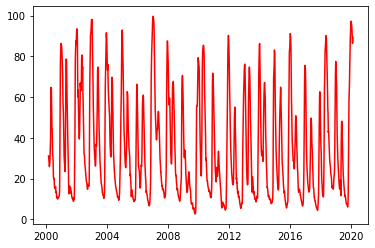

In [4]:
# List comprehension to change the format of the dates (Easier for plotting)

PlottingDates = [dt.datetime.strptime(date, "%d-%m-%Y").date() for date in Dates.tolist()]

# Plotting a simple line graph

plt.plot(PlottingDates,VCI1W,color='r')
plt.show()

## Run the GP 


In [6]:
PredictionDates,WeeklyDates,WeeklyVCI3M,PredictedValues = Forecasting.GetForecastVCI(Dates,VCI1W,VCI3M)

## Plot the forecast and the error

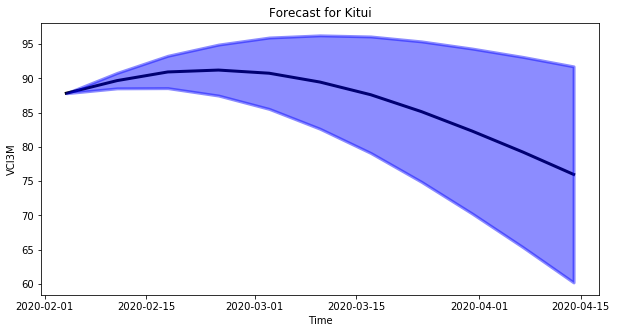

In [7]:
# Slightly fancier code to plot. 

# Adjusting the figure size

fig,ax1 = plt.subplots(figsize=(10,5))

# Shading in the graph to represent the possible error on the forecast. (95% confidence interval)

ax1.fill_between(PredictionDates, PredictedValues-CountyErrors, PredictedValues+CountyErrors,lw=3,
                 label='Forecast VCI3M',color='blue',alpha=0.45,zorder=4,interpolate=True)

# Plotting the actual forecast line

ax1.plot(PredictionDates,PredictedValues,linestyle = 'solid', lw = 3, color = 'black')

# Setting the title

ax1.set_title('Forecast for ' + County)

# Labeling the axes

ax1.set_ylabel('VCI3M')
ax1.set_xlabel('Time')
plt.show()

# Create the PDF report

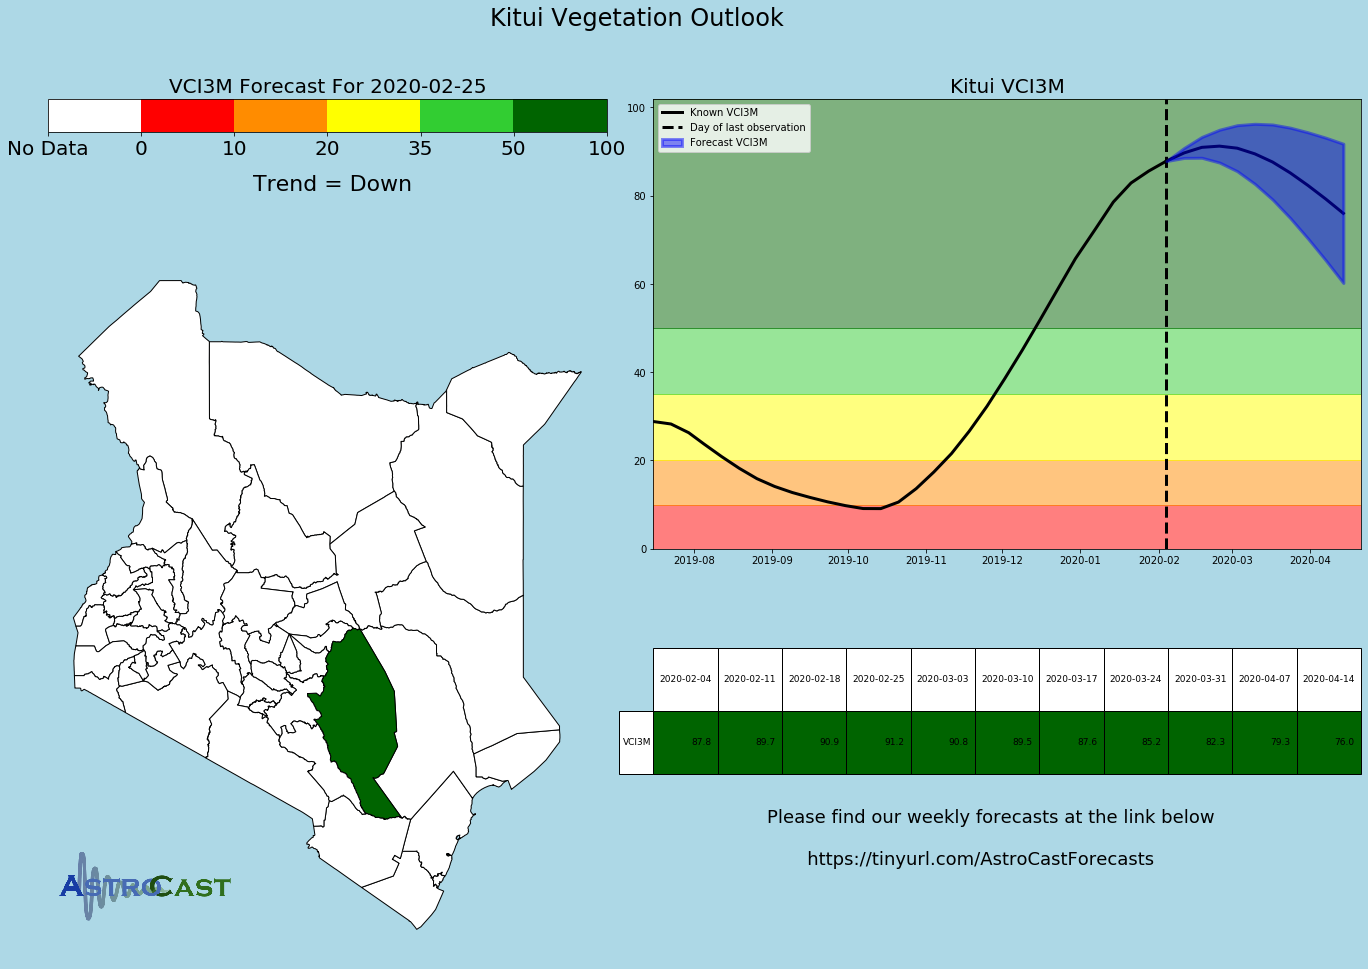

In [8]:
CreatePDF.PDF(PredictionDates,PredictedValues,WeeklyDates,WeeklyVCI3M,CountyErrors,County)